# Triple Pendulum Simulation
When a pendulum is attached to another pendulum and another pendulum is attacted at the other end, it is a triple pendulum. In this HW, the motions of the pendulum will be found out through Lagrangian formulation.

In [38]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
from IPython.display import Image

The setup for the triple pendulum can be seen in the below image.  𝑙1,𝑙2,$l_3$,𝑚1,𝑚2, $m_3$  are the constant in the setup for triple pendulum. Therefore, we will set them as 1 for easier calculation. The variables that will affect the position of the pendulums are  𝜃1, 𝜃2 and $\theta_3$ .

In [39]:
Image(url='https://media.cheggcdn.com/study/a4c/a4c735ba-fd7b-48ac-bb25-b49c59873a86/719688-6-58P-i1.png')

The Lagrange formula for n-pendulum is as followed:

<font size="5">$L = 1/2 \sum_{i=1}^{n} m_i [(\sum_{j=1}^{i} l_j \dot{\theta_j} cos \theta_j)^2 + (\sum_{j=1}^{i} l_j \dot{\theta_j} sin \theta_j)^2] + g \sum_{i=1}^{n} \sum_{j=1}^{i} m_i l_j cos \theta_j$</font>

As for the convenient of calculating the lagrangian formulation of 3-pendulum system, we will set the constant $m_i,l_j, g = 1$ and as we only want 3 pendulum, therefore, n=3. Therefore, the lagrangian formula is as followed:

<font size="5">$L = 1/2 \sum_{i=1}^{3} [(\sum_{j=1}^{i} \dot{\theta_j} cos \theta_j)^2 + (\sum_{j=1}^{i} \dot{\theta_j} sin \theta_j)^2] + \sum_{i=1}^{3} \sum_{j=1}^{i} cos \theta_j$</font>

using the euler-lagrangian equation:

<font size="5">$\frac{d}{dt} (\frac{\partial L}{\partial \dot{q_i}}) - \frac{\partial L}{\partial q_i} = 0$ for $q_i = \theta_1, \theta_2, \theta_3$</font> 

We will get a matrix formulation with the form A$\ddot{\theta}$ = B, which can be seen in below:

$$\begin{pmatrix} 3 & 2cos(\theta_1 - \theta_2) & cos(\theta_1 - \theta_3) \\
2cos(\theta_1 - \theta_2) & 2 & cos(\theta_2 - \theta_3) \\ cos(\theta_1 - \theta_3) & cos(\theta_2 - \theta_3) & 1
\end{pmatrix} \begin{pmatrix} \ddot{\theta_1} \\  \ddot{\theta_2} \\ \ddot{\theta_3}\end{pmatrix} = \begin{pmatrix} 2 \dot{\theta_2}^2 sin(\theta_2 - \theta_1) - 2\dot{\theta_3}^2 sin(\theta_1 - \theta_3) - 3sin(\theta_1)\\ \dot{\theta_3}^2 sin(\theta_3 - \theta_2) - 2\dot{\theta_1}^2 sin(\theta_2 - \theta_1) - 2sin(\theta_2)\\ -\dot{\theta_1}^2 sin(\theta_3 - \theta_1) - 2\dot{\theta_2}^2 sin(\theta_3 - \theta_2) - sin(\theta_3)\end{pmatrix}$$ 

By solving $\ddot{\theta}$ = A^(-1) B, then we can find three diffrential equation and solve them using solve ODE in the code. This can be seen in the Triple pendulum class.

In [40]:
class TriplePendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    L_i : float
        length of the simple pendulum
    g : float
        gravitational acceleration at the earth's surface
    mass_i : float
        mass of 3 pendulum

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1., L2=1., L3=1., m1=1., m2=1., m3=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.L3 = L3
        self.m1 = m1
        self.m2 = m2
        self.m3 = m3
        self.g = g
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 2-component vector with y[0] = phi(t) and y[1] = dphi/dt
            
        Returns
        -------
        
        """
        
        theta1, z1, theta2, z2, theta3, z3 = y
        
        a = theta1 - theta2
        b = theta2 - theta3
        c = theta1 - theta3
        
        theta1_dot = z1
        theta2_dot = z2
        theta3_dot = z3
        
        det = (6 - 4*np.cos(a)**2 - 3*np.cos(b)**2 + 4*np.cos(a)*np.cos(b)*np.cos(c) - 2*np.cos(c)**2)
        
        S1 = -2 * z2**2 * np.sin(a) - z3**2 * np.sin(c) - 3 * np.sin(theta1)
        S2 = -1 * z3**2 * np.sin(b) + 2 * z1**2 * np.sin(a) - 2 * np.sin(theta2)
        S3 = z1**2 * np.sin(c) + z2**2 * np.sin(b) - np.sin(theta3)
        
        z1_dot = ((2 - np.cos(b)**2) * S1 + (-2*np.cos(a) + np.cos(b) * np.cos(c)) * S2 + \
                 (2*np.cos(a)*np.cos(b) - 2*np.cos(c)) * S3) / det
        
        z2_dot = ((-2*np.cos(a) + np.cos(b)*np.cos(c)) * S1 + (3 - np.cos(c)**2) * S2 + \
                 (-3*np.cos(b) + 2*np.cos(c)*np.cos(a)) * S3) / det
        
        z3_dot = ((2*np.cos(a)*np.cos(b) - 2*np.cos(c)) * S1 + (-3*np.cos(b) + 2*np.cos(c)*np.cos(a)) * S2 + \
                 (6 - 4*np.cos(a)**2) * S3) / det
        
        return theta1_dot, z1_dot, theta2_dot, z2_dot, theta3_dot, z3_dot
    
    def solve_ode(self, t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0, theta3_0, theta3_dot_0,
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [theta1_0, theta1_dot_0, theta2_0, theta2_dot_0, theta3_0, theta3_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        theta1, theta1_dot, theta2, theta2_dot, theta3, theta3_dot = solution.y

        return theta1, theta1_dot, theta2, theta2_dot, theta3, theta3_dot

In [41]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [42]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [43]:
# Labels for individual plot axes
theta_vs_time_labels = (r'$t$', r'$\theta(t)$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
L3 = 1.
g = 1.
m1 = 1.
m2 = 1.
m3 = 1.

# Instantiate a pendulum 
p1 = TriplePendulum(L1=L1, L2=L2, L3=L3, m1=m1, m2=m2, m3=m3, g=g)

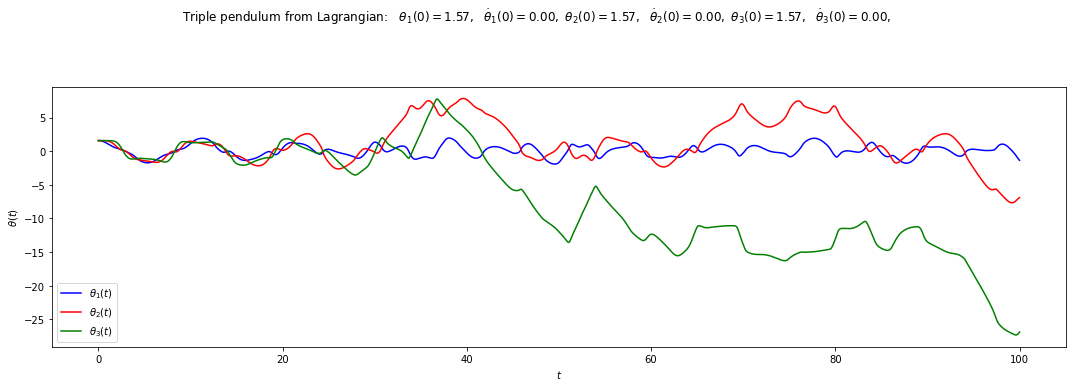

In [44]:
# both plots: same initial conditions
theta1_0 = np.pi/2
theta1_dot_0 = 0.
theta2_0 = np.pi/2
theta2_dot_0 = 0.
theta3_0 = np.pi/2
theta3_dot_0 = 0.

theta1, theta1_dot, theta2, theta2_dot, theta3, theta3_dot = \
    p1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0, theta3_0, theta3_dot_0)


# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Triple pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf'  $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf'  $\dot\theta_2(0) = {theta2_dot_0:.2f},$' + \
                rf' $\theta_3(0) = {theta3_0:.2f},$' + \
                rf'  $\dot\theta_3(0) = {theta3_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], theta1[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=r'$\theta_1(t)$', 
            ax=ax_a)    

plot_y_vs_x(t_pts[start : stop], theta2[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='red',
            label=r'$\theta_2(t)$', 
            ax=ax_a)  

plot_y_vs_x(t_pts[start : stop], theta3[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='green',
            label=r'$\theta_3(t)$', 
            ax=ax_a) 
                              
fig.tight_layout()
fig.savefig('triple_pendulum_Lagrange1(0-500).png', bbox_inches='tight')  

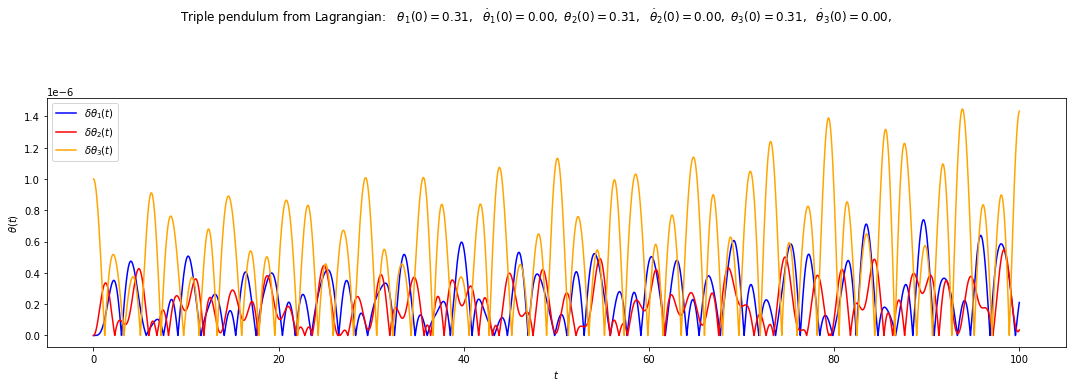

In [45]:
# both plots: same initial conditions
theta1_0 = np.pi/10
theta1_dot_0 = 0.
theta2_0 = np.pi/10
theta2_dot_0 = 0.
theta3_0 = np.pi/10
theta3_dot_0 = 0.

theta1, theta_dot, theta2, theta2_dot, theta3, theta3_dot = \
    p1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0, theta3_0, theta3_dot_0)

theta11, theta11_dot, theta22, theta22_dot, theta33, theta33_dot = \
    p1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0, theta3_0-0.000001, theta3_dot_0)

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Triple pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf'  $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf'  $\dot\theta_2(0) = {theta2_dot_0:.2f},$' + \
                rf' $\theta_3(0) = {theta3_0:.2f},$' + \
                rf'  $\dot\theta_3(0) = {theta3_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# plot
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], np.abs(theta1[start:stop]-theta11[start:stop]),
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=r'$\delta\theta_1(t)$', 
            ax=ax_a)    

plot_y_vs_x(t_pts[start : stop], np.abs(theta2[start:stop]-theta22[start:stop]),
            axis_labels=theta_vs_time_labels, 
            color='red',
            label=r'$\delta\theta_2(t)$', 
            ax=ax_a)  

plot_y_vs_x(t_pts[start : stop], np.abs(theta3[start:stop]-theta33[start:stop]),
            axis_labels=theta_vs_time_labels, 
            color='orange',
            label=r'$\delta\theta_3(t)$', 
            ax=ax_a)  
                              
fig.tight_layout()
fig.savefig('triple_pendulum_Lagrange2.png', bbox_inches='tight')  

# Animate Triple Pendulum

In [46]:
def coordinate(x0, y0, theta, L):

    x = x0 + L*np.sin(theta)
    y = y0 - L*np.cos(theta)
    
    return x,y

In [47]:
# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 500.
delta_t = 0.1

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

In [52]:
#initial conditions
theta1_0 = np.pi/2
theta1_dot_0 = 0.
theta2_0 = np.pi/2
theta2_dot_0 = 0.
theta3_0 = np.pi/2
theta3_dot_0 = 0.

theta1, theta1_dot, theta2, theta2_dot, theta3, theta3_dot = \
    p1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0, theta3_0, theta3_dot_0)

#small angle chaos at theta_3_0
theta1a, theta1a_dot, theta2a, theta2a_dot, theta3a, theta3a_dot = \
    p1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0, theta3_0-0.00001, theta3_dot_0)

In [49]:
%%capture

x_max = 5.0
x_min = -x_max
y_max = 5.0
y_min = -y_max
x0 = 0.0
y0 = 0.0 

fig_anim = plt.figure(figsize=(5,5), num='Triple Pendulum')
ax_anim = fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(x_min, x_max)
ax_anim.set_ylim(y_min, y_max)

# By assigning the first return from plot to line_anim, we can later change
#  the values in the line.
p0_anim, = ax_anim.plot(x0, y0, 'o', markersize = 4, color='blue')

x1, y1 = coordinate(x0, y0, theta1[0], p1.L1)
p1_anim, = ax_anim.plot(x1, y1, 'o', markersize = 4, color='blue')
ln1_anim, = ax_anim.plot([x0,x1], [y0,y1], color = 'blue', lw=2)

x2, y2 = coordinate(x1, y1, theta2[0], p1.L2)
p2_anim, = ax_anim.plot(x2, y2, 'o', markersize = 4, color='blue')
ln2_anim, = ax_anim.plot([x1,x2], [y1,y2], color = 'blue', lw=2)

x3, y3 = coordinate(x2, y2, theta3[0], p1.L3)
p3_anim, = ax_anim.plot(x3, y3, 'o', markersize = 4, color='blue')
ln3_anim, = ax_anim.plot([x2,x3], [y2,y3], color = 'blue', lw=2)

"""
Second Triple pendulum plot design.
"""
#The pendulum with small angle difference at theta_3
x1a, y1a = coordinate(x0, y0, theta1a[0], p1.L1)
p1a_anim, = ax_anim.plot(x1a, y1a, 'o', markersize = 4, color='green')
ln1a_anim, = ax_anim.plot([x0,x1a], [y0,y1a], color = 'green', lw=2)

x2a, y2a = coordinate(x1a, y1a, theta2a[0], p1.L2)
p2a_anim, = ax_anim.plot(x2a, y2a, 'o', markersize = 4, color='green')
ln2a_anim, = ax_anim.plot([x1a,x2a], [y1a,y2a], color = 'green', lw=2)

x3a, y3a = coordinate(x2a, y2a, theta3a[0], p1.L3)
p3a_anim, = ax_anim.plot(x3a, y3a, 'o', markersize = 4, color='green')
ln3a_anim, = ax_anim.plot([x2a,x3a], [y2a,y3a], color = 'green', lw=2)

ax_anim.set_aspect(1)
fig_anim.tight_layout()

In [50]:
def animate_Triple_pendulum(i):
    """This is the function called by FuncAnimation to create each frame,
        numbered by i.  So each i corresponds to a point in the t_pts
        array, with index i.
    """
    x0 = 0
    y0 = 0
    p0_anim.set_data(x0, y0)

    x1, y1 = coordinate(x0, y0, theta1[i], p1.L1)
    p1_anim.set_data(x1, y1)
    ln1_anim.set_data([x0,x1], [y0,y1])

    x2, y2 = coordinate(x1, y1, theta2[i], p1.L2)
    p2_anim.set_data(x2, y2)
    ln2_anim.set_data([x1,x2], [y1,y2])
    
    x3, y3 = coordinate(x2, y2, theta3[i], p1.L3)
    p3_anim.set_data(x3, y3)
    ln3_anim.set_data([x2,x3], [y2,y3])
    
    x1a, y1a = coordinate(x0, y0, theta1a[i], p1.L1)
    p1a_anim.set_data(x1a, y1a)
    ln1a_anim.set_data([x0,x1a], [y0,y1a])

    x2a, y2a = coordinate(x1a, y1a, theta2a[i], p1.L2)
    p2a_anim.set_data(x2a, y2a)
    ln2a_anim.set_data([x1a,x2a], [y1a,y2a])
    
    x3a, y3a = coordinate(x2a, y2a, theta3a[i], p1.L3)
    p3a_anim.set_data(x3a, y3a)
    ln3a_anim.set_data([x2a,x3a], [y2a,y3a])

    return (p0_anim, p1_anim, ln1_anim, p2_anim, ln2_anim, p3_anim, ln3_anim,
            p1a_anim, ln1a_anim, p2a_anim, ln2a_anim, p3a_anim, ln3a_anim)   # this is needed for blit=True to work

In [51]:
frame_interval = 20.  # time between frames
frame_number = 1001  # number of frames to include (index of t_pts)
anim = animation.FuncAnimation(fig_anim, 
                               animate_Triple_pendulum, 
                               init_func=None,
                               frames=frame_number, 
                               interval=frame_interval, 
                               blit=True,
                               repeat=False)

#fig.show()

HTML(anim.to_jshtml())

The simulation above shows the pendulum moving in different pattern, when there are small angle change. The green pendulum has a small angle difference in $\theta_3$, compare with the blue pendulum.